# Fonction

In [7]:
from sklearn.preprocessing import MinMaxScaler
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import NaiveSeasonal, NaiveDrift, AutoARIMA, ARIMA
import numpy as np
from darts.metrics import mape, mase, mae, mse
import matplotlib.pyplot as plt
import os
import pandas as pd


# Naive saisonal

In [66]:
%matplotlib agg

df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)

print(df_tel.shape)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_naive_saisonal = pd.DataFrame(columns = ['model','Entite', 'Famille','mape','mase','mae','mse'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        print(entite,famille)
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]  
        if len(df)>0:      
            df = df.asfreq('d')
            df.Entite = df.Entite.fillna(entite)
            df.Famille = df.Famille.fillna(famille)
            df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
            df = df.reset_index(names='date')
            series = TimeSeries.from_dataframe(df=df, time_col="date", value_cols='Nombre_entrants_corrige')
            scaler = MinMaxScaler(feature_range=(-1, 1))
            scaler = Scaler(scaler)

            train, val = series[:-45], series[-45:]
            train = scaler.fit_transform(train)
            val = scaler.transform(val)
            series_norm = scaler.transform(series)
            model = NaiveSeasonal(K=7)            # init
            model.fit(train)                      # fit
            pred = model.predict(n=45) 
            mape_score = mape(val, pred)
            mase_score = mase(val, pred,insample = train, m=7)
            mae_score = mae(val, pred)
            mse_score = mse(val, pred)
            row_dict= {
                'model':'NaiveSeasonal',
                'Entite':entite, 'Famille':famille,
                'mape':mape_score, 'mase':mase_score,
                'mae':mae_score, 'mse':mse_score
            }
            df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)
            


            plt.figure(figsize=(8,6))
            series_norm[-90:].plot(lw=3)
            pred.plot(lw=3, label='forecast')
            plt.savefig(f'images/output/naive_saisonal/{entite}_{famille}.png')
df_naive_saisonal.to_csv("data/df_naive_saisonal.csv",index=False)

(11903, 3)
Entite 1 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 3 F1
Entite 4 F1
Entite 5 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 1 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 3 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 4 F2
Entite 5 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 1 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 3 F3
Entite 4 F3
Entite 5 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 1 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F5
Entite 3 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 4 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 5 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 1 F6


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F6
Entite 3 F6
Entite 4 F6
Entite 5 F6


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 1 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 2 F7
Entite 3 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 4 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


Entite 5 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/3398170501.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_naive_saisonal = df_naive_saisonal.append(row_dict, ignore_index=True)


# Naive Drift

In [70]:
%matplotlib agg

df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)

print(df_tel.shape)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_result = pd.DataFrame(columns = ['model','Entite', 'Famille','mape','mase','mae','mse'])
model_name = 'naive_drift'
os.mkdir(f'images/output/{model_name}')
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        print(entite,famille)
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]  
        if len(df)>0:      
            df = df.asfreq('d')
            df.Entite = df.Entite.fillna(entite)
            df.Famille = df.Famille.fillna(famille)
            df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
            df = df.reset_index(names='date')
            series = TimeSeries.from_dataframe(df=df, time_col="date", value_cols='Nombre_entrants_corrige')
            scaler = MinMaxScaler(feature_range=(-1, 1))
            scaler = Scaler(scaler)

            train, val = series[:-45], series[-45:]
            train = scaler.fit_transform(train)
            val = scaler.transform(val)
            series_norm = scaler.transform(series)
            model = NaiveDrift()            # init
            model.fit(train)                      # fit
            pred = model.predict(n=45) 
            mape_score = mape(val, pred)
            mase_score = mase(val, pred,insample = train, m=7)
            mae_score = mae(val, pred)
            mse_score = mse(val, pred)
            row_dict= {
                'model':'NaiveDrift',
                'Entite':entite, 'Famille':famille,
                'mape':mape_score, 'mase':mase_score,
                'mae':mae_score, 'mse':mse_score
            }
            df_result = df_result.append(row_dict, ignore_index=True)
            


            plt.figure(figsize=(8,6))
            series_norm[-90:].plot(lw=3)
            pred.plot(lw=3, label='forecast')
            plt.savefig(f'images/output/{model_name}/{entite}_{famille}.png')
df_result.to_csv(f"data/{model_name}.csv",index=False)

(11903, 3)
Entite 1 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F1
Entite 4 F1
Entite 5 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F2
Entite 5 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F3
Entite 4 F3
Entite 5 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F5
Entite 3 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F6


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F6
Entite 3 F6
Entite 4 F6
Entite 5 F6


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F7
Entite 3 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/4264650734.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


# AUTO-arima

In [72]:
%matplotlib agg

df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)

print(df_tel.shape)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_result = pd.DataFrame(columns = ['model','Entite', 'Famille','mape','mase','mae','mse'])
model_name = 'auto_arima'
os.mkdir(f'images/output/{model_name}')
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        print(entite,famille)
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]  
        if len(df)>0:      
            df = df.asfreq('d')
            df.Entite = df.Entite.fillna(entite)
            df.Famille = df.Famille.fillna(famille)
            df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
            df = df.reset_index(names='date')
            series = TimeSeries.from_dataframe(df=df, time_col="date", value_cols='Nombre_entrants_corrige')
            scaler = MinMaxScaler(feature_range=(-1, 1))
            scaler = Scaler(scaler)

            train, val = series[:-45], series[-45:]
            train = scaler.fit_transform(train)
            val = scaler.transform(val)
            series_norm = scaler.transform(series)
            model = AutoARIMA( start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, # it means use the test
                         D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)           # init
            model.fit(train)                      # fit
            pred = model.predict(n=45) 
            mape_score = mape(val, pred)
            mase_score = mase(val, pred,insample = train, m=7)
            mae_score = mae(val, pred)
            mse_score = mse(val, pred)
            row_dict= {
                'model':'NaiveDrift',
                'Entite':entite, 'Famille':famille,
                'mape':mape_score, 'mase':mase_score,
                'mae':mae_score, 'mse':mse_score
            }
            df_result = df_result.append(row_dict, ignore_index=True)
            


            plt.figure(figsize=(8,6))
            series_norm[-90:].plot(lw=3)
            pred.plot(lw=3, label='forecast')
            plt.savefig(f'images/output/{model_name}/{entite}_{famille}.png')
df_result.to_csv(f"data/{model_name}.csv",index=False)

(11903, 3)
Entite 1 F1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=124.624, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=94.653, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=123.277, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=126.166, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=82.348, Time=0.62 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=82.417, Time=0.90 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=84.292, Time=1.35 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=82.910, Time=1.72 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=82.225, Time=0.70 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=94.487, Time=0.32 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, 

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=419.208, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=234.760, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=11.518, Time=1.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=417.318, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=406.098, Time=0.55 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=5.78 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=239.040, Time=2.52 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=6.99 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=51.096, Time=1.73 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=8.020, Time=1.82 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=406.748, Time=0.80 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=3.38 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=inf, Time=3.42 se

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F1
Entite 4 F1
Entite 5 F1
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-551.614, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-827.824, Time=1.41 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-553.584, Time=0.38 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-638.174, Time=0.99 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=-906.591, Time=2.44 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.49 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=-809.194, Time=2.05 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=-909.582, Time=3.76 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=-831.383, Time=0.95 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.73 sec
 ARIMA(3,0,0)(2,1,0)[7] int

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F2
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-135.882, Time=2.61 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=171.930, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=18.445, Time=1.48 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-98.109, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=170.108, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=157.823, Time=0.75 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-128.798, Time=3.73 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-134.635, Time=8.14 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=20.261, Time=2.16 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-133.194, Time=9.34 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-104.806, Time=1.05 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=-126.219, Time=3.55 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=-143.816, Time=3.75 sec
 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=153.935, Time=1.70 sec
 ARIMA(1,0,2)(1,1,1)[7] interc

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F2
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.98 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=45.890, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-150.794, Time=1.03 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-348.557, Time=2.98 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=43.992, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=42.528, Time=0.86 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-346.561, Time=1.84 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-346.561, Time=3.93 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-149.640, Time=0.84 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=-344.568, Time=3.80 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-326.913, Time=0.87 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-350.673, Time=2.66 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=44.086, Time=1.07 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=-348.674, Time=3.86 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept 

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F2
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=168.190, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-9.450, Time=1.53 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-181.931, Time=1.31 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=166.204, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=167.315, Time=0.44 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=6.23 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-8.466, Time=0.90 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=5.51 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-172.968, Time=1.38 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-187.668, Time=2.21 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=165.208, Time=0.35 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=inf, Time=5.

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F2
Entite 5 F2
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-551.786, Time=0.30 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-732.348, Time=1.66 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-912.315, Time=1.80 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-553.743, Time=0.16 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=-549.934, Time=0.54 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-910.701, Time=2.42 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-910.697, Time=4.63 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-732.056, Time=1.03 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=-908.872, Time=6.85 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-906.366, Time=1.10 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-914.391, Time=4.31 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=-548.616, Time=1.59 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=-912.822, Time=6.10 sec
 ARIMA(0,0,2)(

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F3
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=484.998, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=338.263, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=483.018, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=475.298, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=221.832, Time=1.83 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=13.89 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=6.33 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=236.578, Time=5.84 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=213.713, Time=5.18 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=328.163, Time=1.74 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=21.63 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=16.29 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=207.171, Time=

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F3
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=494.918, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=318.711, Time=0.78 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=492.922, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=468.023, Time=0.36 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=211.702, Time=5.43 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=8.90 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.31 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=257.268, Time=2.30 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=204.070, Time=5.72 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=313.758, Time=3.00 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=17.31 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=195.858, Time=2.

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F3
Entite 4 F3
Entite 5 F3
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=44.874, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-176.048, Time=0.98 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=42.878, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-4.061, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=-297.810, Time=2.68 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=-226.124, Time=1.66 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=-300.011, Time=2.21 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=-178.250, Time=1.00 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=6.50 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F5
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-167.680, Time=3.82 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=253.752, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=42.918, Time=1.14 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-164.482, Time=2.32 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=252.141, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=255.206, Time=0.61 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-170.457, Time=3.56 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=44.619, Time=1.76 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-161.285, Time=6.56 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-164.460, Time=19.74 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-165.152, Time=8.59 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=-47.959, Time=4.06 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=-165.642, Time=6.96 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-162.974, Time=1.20 sec
 ARIMA(1,0,0)(1,1,1)[7] inte

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F5
Entite 3 F5
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-254.739, Time=2.30 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=81.993, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-96.982, Time=1.03 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-241.650, Time=1.79 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=80.143, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=52.598, Time=0.48 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-259.977, Time=3.21 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-94.999, Time=1.41 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-258.897, Time=4.62 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-255.391, Time=5.46 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-259.359, Time=5.34 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=-161.709, Time=2.69 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=-255.977, Time=7.43 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-249.552, Time=2.24 sec
 ARIMA(1,0,0)(1,1

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F5
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=260.436, Time=5.40 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=601.635, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=454.431, Time=0.89 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=266.296, Time=1.51 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=599.739, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=605.400, Time=1.02 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=3.77 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=6.61 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=456.263, Time=1.78 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=7.63 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=265.908, Time=1.45 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=3.86 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=270.174, Time=1.07 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=267.426, Time

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F5
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=316.948, Time=0.25 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=142.847, Time=1.03 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-80.691, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=315.100, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=317.643, Time=0.35 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-78.867, Time=2.43 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-78.886, Time=3.98 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=143.714, Time=0.83 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=-80.430, Time=6.00 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-72.201, Time=1.74 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-85.996, Time=2.09 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=317.577, Time=0.67 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=-84.192, Time=4.35 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : A

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.58 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=285.851, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=82.738, Time=0.98 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-112.155, Time=2.02 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=284.046, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=277.833, Time=0.32 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=-110.158, Time=3.10 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-110.158, Time=3.13 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=85.052, Time=0.66 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=-108.203, Time=4.11 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-86.401, Time=0.91 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-117.140, Time=3.80 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=277.548, Time=0.42 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=-115.141, Time=3.22 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept  

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F6
Entite 3 F6
Entite 4 F6
Entite 5 F6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-248.646, Time=6.48 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=143.799, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-33.610, Time=1.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-221.462, Time=2.41 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=142.391, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=135.469, Time=1.43 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-244.324, Time=4.06 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-240.608, Time=11.31 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-35.749, Time=4.44 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-244.730, Time=15.25 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-226.597, Time=2.15 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=-244.198, Time=6.88 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=-248.290, Time=6.30 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-199.059, Ti

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-558.761, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-728.968, Time=1.13 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-923.771, Time=1.59 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-560.726, Time=0.10 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=-586.240, Time=0.38 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=7.79 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=11.55 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=-724.092, Time=4.05 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=20.65 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-881.047, Time=0.96 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-925.902, Time=4.72 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=-585.867, Time=1.11 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=9.97 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=in

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F7
Entite 3 F7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-195.391, Time=4.47 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=165.864, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-4.181, Time=1.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-176.809, Time=2.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=164.023, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=156.307, Time=0.89 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-192.514, Time=3.03 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-193.716, Time=7.75 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-2.186, Time=2.26 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-192.830, Time=12.13 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-181.856, Time=2.13 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=-198.256, Time=5.50 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=142.014, Time=3.86 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=-184.690, Time=5.13 sec
 ARIMA(2,0,1)(0,

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=11.13 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=254.406, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=102.326, Time=1.68 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-113.617, Time=2.86 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=252.623, Time=0.17 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=255.258, Time=0.64 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=3.78 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=11.65 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=103.282, Time=3.95 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=22.19 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-100.045, Time=1.78 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=-113.656, Time=3.72 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=256.305, Time=1.73 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=12.37 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=inf, T

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F7
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=361.857, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=192.016, Time=0.71 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-29.268, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=359.970, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=360.530, Time=0.34 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=4.14 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=10.58 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=192.736, Time=2.12 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=10.08 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=-15.007, Time=2.90 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=4.52 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=5.14 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=8.45 sec
 ARIMA(0,0,1)(0,1,1)[7]             : AIC=-31.213, Time=0.68 

/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_38207/2998882079.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


# Sarima

In [12]:
%matplotlib agg

df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)
sarima_parameters = pd.read_csv('data/sarima_parameters.csv')

print(df_tel.shape)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_result = pd.DataFrame(columns = ['model','Entite', 'Famille','mape','mase','mae','mse'])
model_name = 'sarima'
os.makedirs(f'images/output/{model_name}', exist_ok=True)
for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        print(entite,famille)
        
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]  

        sarima_parameter = sarima_parameters[(sarima_parameters["Entite"] == entite)& (sarima_parameters["Famille"] == famille)] 
        if len(df)>0:      
            df = df.asfreq('d')
            df.Entite = df.Entite.fillna(entite)
            df.Famille = df.Famille.fillna(famille)
            df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
            df = df.reset_index(names='date')
            series = TimeSeries.from_dataframe(df=df, time_col="date", value_cols='Nombre_entrants_corrige')
            scaler = MinMaxScaler(feature_range=(-1, 1))
            scaler = Scaler(scaler)

            train, val = series[:-45], series[-45:]
            train = scaler.fit_transform(train)
            val = scaler.transform(val)
            series_norm = scaler.transform(series)
            model = ARIMA(
                        p = sarima_parameter.p.iloc[0],
                        q = sarima_parameter.q.iloc[0],
                        d = sarima_parameter.d.iloc[0],
                        seasonal_order = (
                            sarima_parameter.P.iloc[0],
                            sarima_parameter.D.iloc[0],
                            sarima_parameter.Q.iloc[0],
                            sarima_parameter.m.iloc[0]
                        ))           # init
            model.fit(train)                      # fit
            pred = model.predict(n=45) 
            mape_score = mape(val, pred)
            mase_score = mase(val, pred,insample = train, m=7)
            mae_score = mae(val, pred)
            mse_score = mse(val, pred)
            row_dict= {
                'model':'Sarima',
                'Entite':entite, 'Famille':famille,
                'mape':mape_score, 'mase':mase_score,
                'mae':mae_score, 'mse':mse_score
            }
            df_result = df_result.append(row_dict, ignore_index=True)
            


            plt.figure(figsize=(8,6))
            series_norm[-90:].plot(lw=3)
            pred.plot(lw=3, label='forecast')
            plt.savefig(f'images/output/{model_name}/{entite}_{famille}.png')
df_result.to_csv(f"data/{model_name}.csv",index=False)

(11903, 3)
Entite 1 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F1
Entite 4 F1
Entite 5 F1


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,6))


Entite 2 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F2
Entite 5 F2


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F3


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 3 F3
Entite 4 F3
Entite 5 F3


/Users/charles/Documents/pythonProject/Seires_temporelles_banque/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Documents/pythonProject/Seires_temporelles_banque/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F5
Entite 3 F5


/Users/charles/Documents/pythonProject/Seires_temporelles_banque/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F5


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F6


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F6
Entite 3 F6
Entite 4 F6
Entite 5 F6


/Users/charles/Documents/pythonProject/Seires_temporelles_banque/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 1 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 2 F7
Entite 3 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 4 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


Entite 5 F7


/var/folders/py/4rt338cj1ks4z3332m7l3f880000gp/T/ipykernel_2520/3510283075.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row_dict, ignore_index=True)


In [21]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)


ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [22]:
prediction = model.predict(len(val), num_samples=1000)

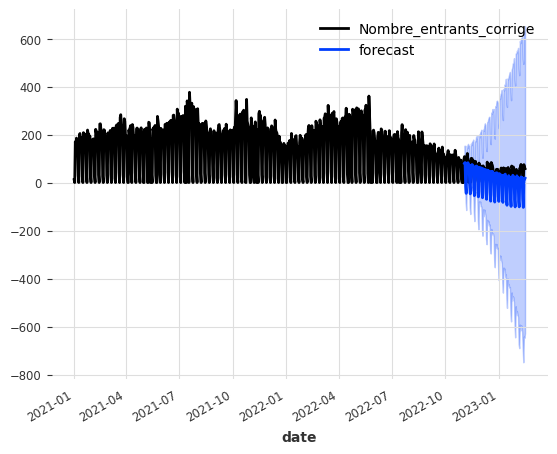

In [23]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

# Multi Series

In [15]:
df_tel = pd.read_csv('data/telephonie_select.csv', index_col="date_appel", parse_dates = True)

print(df_tel.shape)
liste_famille = df_tel.Famille.unique()
liste_entite = df_tel.Entite.unique()

df_freq = pd.DataFrame(columns = ['Entite', 'Famille','Nombre_entrants_corrige'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        df = df_tel[(df_tel["Entite"] == entite)& (df_tel["Famille"] == famille)]
        df = df.asfreq('d')
        df.Entite = df.Entite.fillna(entite)
        df.Famille = df.Famille.fillna(famille)
        df.Nombre_entrants_corrige = df.Nombre_entrants_corrige.fillna(0)
        df_freq = pd.concat([df_freq,df])

df_freq = df_freq.sort_values(['Entite','Famille'],ascending = True)
df_freq = df_freq.reset_index(names="date_appel")
print(df_freq.shape)

(11903, 3)
(14950, 4)


In [16]:
df_freq.columns

Index(['date_appel', 'Entite', 'Famille', 'Nombre_entrants_corrige'], dtype='object')

In [17]:
hierarchy_df = df_freq.groupby(['Entite', 'Famille'])[['Nombre_entrants_corrige']].sum()
hierarchy_df = hierarchy_df.reset_index(drop=False).sort_values(by=['Nombre_entrants_corrige'],
  ascending=False).reset_index(drop=True)

In [18]:
# make copy of df
dataset_scaled_EDA = df_freq.copy()

# min max value calculation
dataset_scaled_EDA['min_Nombre_entrants_corrige'] = dataset_scaled_EDA.groupby(['Entite', 'Famille'])['Nombre_entrants_corrige'].transform(lambda x: x.min())
dataset_scaled_EDA['max_Nombre_entrants_corrige'] = dataset_scaled_EDA.groupby(['Entite', 'Famille'])['Nombre_entrants_corrige'].transform(lambda x: x.max())
# scale
dataset_scaled_EDA['Nombre_entrants_corrige_scaled'] = (dataset_scaled_EDA['Nombre_entrants_corrige'] - dataset_scaled_EDA['min_Nombre_entrants_corrige'])/(dataset_scaled_EDA['max_Nombre_entrants_corrige'] - dataset_scaled_EDA['min_Nombre_entrants_corrige'])
# add info about year, week of year and day of week
dataset_scaled_EDA['year'] = dataset_scaled_EDA['date_appel'].dt.year
dataset_scaled_EDA['month'] = dataset_scaled_EDA['date_appel'].dt.month
dataset_scaled_EDA['day'] = dataset_scaled_EDA['date_appel'].dt.day
dataset_scaled_EDA['day_of_week'] = [d.strftime('%A') for d in dataset_scaled_EDA['date_appel']]
dataset_scaled_EDA['day_of_week'] = pd.Categorical(dataset_scaled_EDA['day_of_week'], 
  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
  ordered=True)



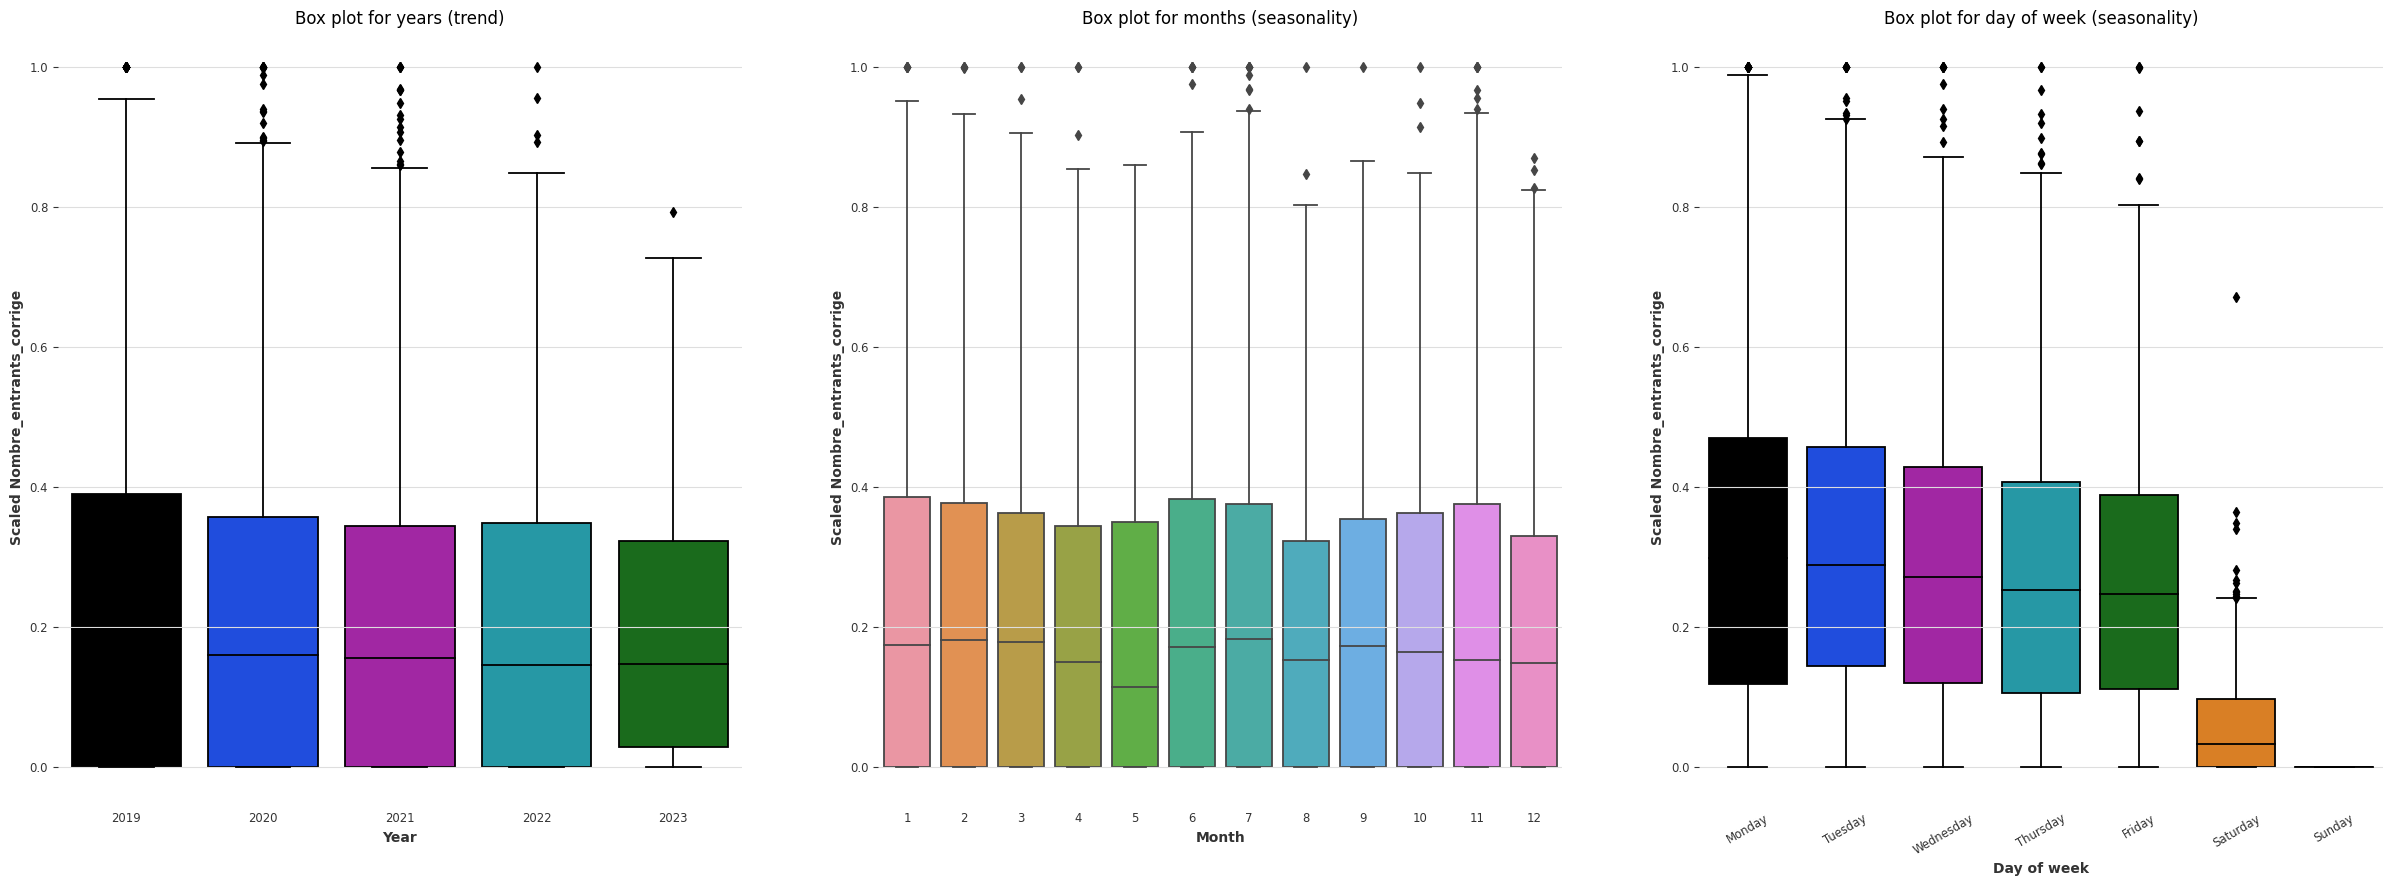

In [30]:
import seaborn as sns
# visualize
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
sns.boxplot(x='year', y='Nombre_entrants_corrige_scaled', data=dataset_scaled_EDA, ax=ax[0]).set(
    xlabel='Year', 
    ylabel='Scaled Nombre_entrants_corrige'
)
ax[0].set_title('Box plot for years (trend)')
sns.boxplot(x='month', y='Nombre_entrants_corrige_scaled', data=dataset_scaled_EDA, ax=ax[1]).set(
    xlabel='Month', 
    ylabel='Scaled Nombre_entrants_corrige'
)
ax[1].set_title('Box plot for months (seasonality)')
sns.boxplot(x='day_of_week', y='Nombre_entrants_corrige_scaled', data=dataset_scaled_EDA, ax=ax[2]).set(
    xlabel='Day of week', 
    ylabel='Scaled Nombre_entrants_corrige'
)
ax[2].set_title('Box plot for day of week (seasonality)')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)
plt.show()

In [29]:
df_freq

,date_appel,Entite,Famille,Nombre_entrants_corrige
0,2022-06-30,Entite 1,F1,38.000000
1,2022-07-01,Entite 1,F1,20.533333
2,2022-07-02,Entite 1,F1,0.000000
3,2022-07-03,Entite 1,F1,0.000000
4,2022-07-04,Entite 1,F1,14.000000
...,...,...,...,...
14945,2023-02-11,Entite 5,F7,765.811111
14946,2023-02-12,Entite 5,F7,0.000000
14947,2023-02-13,Entite 5,F7,3572.463932
14948,2023-02-14,Entite 5,F7,3147.943417


In [19]:
dataset_ts = df_freq.copy()
dataset_ts = TimeSeries.from_group_dataframe(df=dataset_ts, 
                                             group_cols=['Entite', 'Famille'],
                                             time_col='date_appel', 
                                             value_cols='Nombre_entrants_corrige')
dataset_ts

[<TimeSeries (DataArray) (date_appel: 231, component: 1, sample: 1)>
 array([[[38.        ]],
 
        [[20.53333333]],
 
        [[ 0.        ]],
 
        [[ 0.        ]],
 
        [[14.        ]],
 
        [[16.        ]],
 
        [[16.3625    ]],
 
        [[11.        ]],
 
        [[20.        ]],
 
        [[ 0.        ]],
 
 ...
 
        [[ 9.        ]],
 
        [[12.        ]],
 
        [[ 4.4       ]],
 
        [[ 1.        ]],
 
        [[11.        ]],
 
        [[ 0.        ]],
 
        [[ 0.        ]],
 
        [[12.375     ]],
 
        [[ 3.        ]],
 
        [[15.08571429]]])
 Coordinates:
   * date_appel  (date_appel) datetime64[ns] 2022-06-30 2022-07-01 ... 2023-02-15
   * component   (component) object 'Nombre_entrants_corrige'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  static_covariates          Entite Famille\ncomponent ...
     hierarchy:          None,
 <TimeSeries (DataArray) (date_appel: 775, component: 1, samp

### Simple train_test split

In [20]:
from tqdm import tqdm

In [21]:
first_test_date = pd.Timestamp('2023-01-01')
train_dataset_ts, test_dataset_ts = [], []

for single_ts in tqdm(dataset_ts):
    # split into train and test tests
    single_train_ts, single_test_ts = single_ts.split_before(first_test_date)
    train_dataset_ts.append(single_train_ts)
    test_dataset_ts.append(single_test_ts)

100%|██████████| 20/20 [00:00<00:00, 70.13it/s] 


In [30]:
train_dataset_ts

[<TimeSeries (DataArray) (date_appel: 185, component: 1, sample: 1)>
 array([[[38.        ]],
 
        [[20.53333333]],
 
        [[ 0.        ]],
 
        [[ 0.        ]],
 
        [[14.        ]],
 
        [[16.        ]],
 
        [[16.3625    ]],
 
        [[11.        ]],
 
        [[20.        ]],
 
        [[ 0.        ]],
 
 ...
 
        [[ 2.        ]],
 
        [[11.        ]],
 
        [[ 0.        ]],
 
        [[ 0.        ]],
 
        [[ 5.        ]],
 
        [[ 8.        ]],
 
        [[10.21428571]],
 
        [[ 4.        ]],
 
        [[ 8.        ]],
 
        [[ 0.        ]]])
 Coordinates:
   * date_appel  (date_appel) datetime64[ns] 2022-06-30 2022-07-01 ... 2022-12-31
   * component   (component) object 'Nombre_entrants_corrige'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  static_covariates          Entite Famille\ncomponent ...
     hierarchy:          None,
 <TimeSeries (DataArray) (date_appel: 729, component: 1, samp

In [27]:
from darts.models import NaiveSeasonal

for single_ts in train_dataset_ts[0]:
    naive_model = NaiveSeasonal(K=7)            # init
    naive_model.fit(single_ts)                      # fit
    naive_forecast = naive_model.predict(n=36) 

ValueError: Train series only contains 1 elements but NaiveSeasonal(K=7) model requires at least 7 entries


ValueError: Train series only contains 1 elements but NaiveSeasonal(K=7) model requires at least 7 entries

In [23]:
forecast_horizons = len(test_dataset_ts[0])
forecast_horizons

46

In [24]:
from joblib import Parallel, delayed
forecast_horizons = len(test_dataset_ts[0])

def _backtests_local_estimator(_estimator, _ts_set, _split_date, _horizons, _single_forecast):
    model = _estimator
    if _single_forecast:
        model.fit(_ts_set.split_before(_split_date)[0])
        backtests_single_ts = model.predict(_horizons)
    
    else:
        backtests_single_ts = model.historical_forecasts(series=_ts_set, 
                                                         start=_split_date - np.timedelta64(_horizons-1, 'D'), 
                                                         verbose=False, 
                                                         overlap_end=False,
                                                         last_points_only=True, 
                                                         forecast_horizon=_horizons,
                                                         retrain=True)
    
    return backtests_single_ts

def backtests_multiple_local_estimators(estimator, multiple_ts_sets=dataset_ts, split_date=first_test_date, horizons=forecast_horizons, single_forecast=True):
    backtests_multiple_ts = Parallel(n_jobs=-1,
                                     verbose=5, 
                                     backend = 'multiprocessing',
                                     pre_dispatch='1.5*n_jobs')(
            delayed(_backtests_local_estimator)(
                _estimator=estimator,
                _ts_set=single_ts_set,
                _split_date=split_date,
                _horizons=horizons,
                _single_forecast=single_forecast
            )
        for single_ts_set in multiple_ts_sets
    )
    
    return backtests_multiple_ts

In [25]:
import numpy as np
from darts.metrics import mape
def get_overall_MAPE(prediction_series, test_series=test_dataset_ts):
    return np.round(np.mean(mape(actual_series=test_series, 
                                 pred_series=prediction_series, n_jobs=-1)),
                    2)

In [26]:
from darts.models import NaiveSeasonal
backtests_baseline_model = backtests_multiple_local_estimators(estimator=NaiveSeasonal(K=7))
print(f'overall MAPE: {get_overall_MAPE(backtests_baseline_model)}%')

/Users/charles/Documents/pythonProject/Seires_temporelles_banque/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 4 concurrent workers.
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python@

KeyboardInterrupt: 